In [1]:
import os
if not os.path.exists("./classes.txt"):
  !wget 'https://raw.githubusercontent.com/kbhartiya/QuickDraw-Lite/master/classes.txt'

--2019-03-21 15:30:37--  https://raw.githubusercontent.com/kbhartiya/QuickDraw-Lite/master/classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     760  --.-KB/s    in 0s      

2019-03-21 15:30:37 (103 MB/s) - ‘classes.txt’ saved [760/760]



In [0]:
with open("./classes.txt","r") as f:
  classes = f.readlines()

classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [0]:
if not os.path.exists("./data"):
  os.mkdir('./data')

In [4]:
!ls

classes.txt  data  sample_data


In [0]:
import urllib.request
def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, './data/'+c+'.npy')

In [6]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

In [0]:
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        print(file)
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [9]:
x_train, y_train, x_test, y_test, class_names = load_data('./data')
num_classes = len(class_names)
image_size = 28

./data/bird.npy
./data/butterfly.npy
./data/shorts.npy
./data/square.npy
./data/eyeglasses.npy
./data/hat.npy
./data/mountain.npy
./data/radio.npy
./data/spider.npy
./data/pizza.npy
./data/cup.npy
./data/pants.npy
./data/pillow.npy
./data/alarm_clock.npy
./data/envelope.npy
./data/car.npy
./data/spoon.npy
./data/camera.npy
./data/airplane.npy
./data/lightning.npy
./data/pencil.npy
./data/bread.npy
./data/flower.npy
./data/diving_board.npy
./data/t-shirt.npy
./data/bicycle.npy
./data/candle.npy
./data/bridge.npy
./data/baseball_bat.npy
./data/cell_phone.npy
./data/hot_dog.npy
./data/line.npy
./data/cloud.npy
./data/sword.npy
./data/ice_cream.npy
./data/door.npy
./data/coffee_cup.npy
./data/cat.npy
./data/wristwatch.npy
./data/paper_clip.npy
./data/axe.npy
./data/hammer.npy
./data/rifle.npy
./data/smiley_face.npy
./data/broom.npy
./data/headphones.npy
./data/tooth.npy
./data/suitcase.npy
./data/face.npy
./data/snake.npy
./data/anvil.npy
./data/mushroom.npy
./data/basketball.npy
./data/be

star


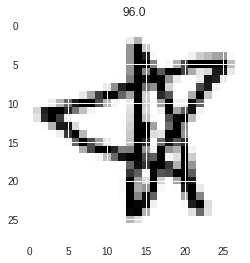

In [10]:
#Run this cell to this different drawings.
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28))
plt.title(y_train[idx])
print(class_names[int(y_train[idx].item())])

In [0]:
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flat

In [13]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=10)

Train on 288000 samples, validate on 32000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 250s - loss: 1.9365 - top_k_categorical_accuracy: 0.7789 - val_loss: 1.3612 - val_top_k_categorical_accuracy: 0.8792
Epoch 2/10
 - 246s - loss: 1.2453 - top_k_categorical_accuracy: 0.8920 - val_loss: 1.1921 - val_top_k_categorical_accuracy: 0.8983
Epoch 3/10
 - 249s - loss: 1.0866 - top_k_categorical_accuracy: 0.9098 - val_loss: 1.0761 - val_top_k_categorical_accuracy: 0.9119
Epoch 4/10
 - 251s - loss: 0.9986 - top_k_categorical_accuracy: 0.9190 - val_loss: 1.0105 - val_top_k_categorical_accuracy: 0.9182
Epoch 5/10
 - 254s - loss: 0.9376 - top_k_categorical_accuracy: 0.9250 - val_loss: 0.9693 - val_top_k_categorical_accuracy: 0.9218
Epoch 6/10
 - 254s - loss: 0.8925 - top_k_categorical_accuracy: 0.9299 - val_loss: 0.9444 - val_top_k_categorical_accuracy: 0.9237
Epoch 7/10
 - 250s - loss: 0.8577 - top_k_categorical_accuracy: 0.9330 - val_loss: 0.9192 - val_top_k_categorical_a

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.86%


In [15]:
model.save("quickdraw_model_keras.h5")

['door', 'cell_phone', 'power_outlet', 'traffic_light', 'book']


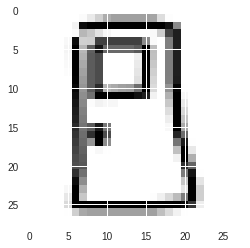

In [18]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [0]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [20]:
!pip install tensorflowjs 

    100% |████████████████████████████████| 80.3MB 186kB/s 
    100% |████████████████████████████████| 13.9MB 1.3MB/s 
    100% |████████████████████████████████| 61kB 19.5MB/s 
    100% |████████████████████████████████| 358kB 11.0MB/s 
    100% |████████████████████████████████| 3.0MB 9.3MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [22]:
!mkdir model
!tensorflowjs_converter --input_format keras quickdraw_model_keras.h5 model/

mkdir: cannot create directory ‘model’: File exists


In [0]:
!cp class_names.txt model/class_names.txt

In [24]:
!zip -r model.zip model


  adding: model/ (stored 0%)
  adding: model/class_names.txt (deflated 42%)
  adding: model/model.json (deflated 85%)
  adding: model/group1-shard1of1.bin (deflated 7%)


In [0]:
from google.colab import files
files.download('model.zip')